# Data Processing

Reference Locations can be found under headings as shown below, e.g.:

# Reference Location X

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

%matplotlib inline

# Load the dataset
df = pd.read_csv('OnlineShopping.csv')

df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [3]:
df.shape

(12330, 18)

In [4]:
# Total sums for types of webpage

print(df['Administrative'].sum())
print(df['Informational'].sum())
print(df['ProductRelated'].sum())

28546
6209
391249


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

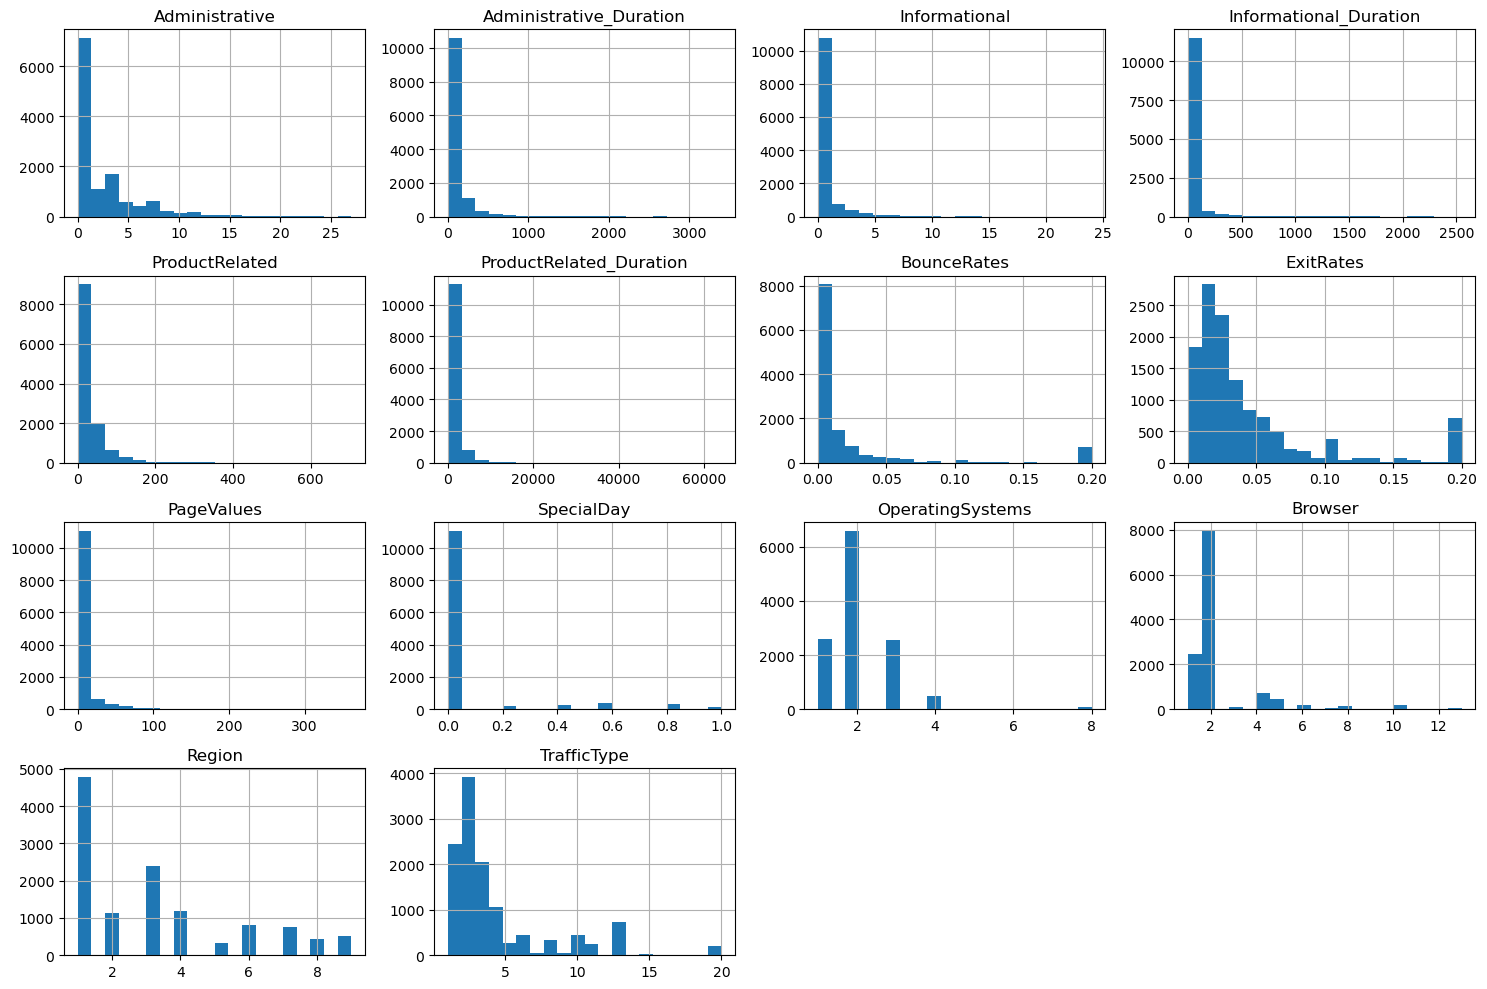

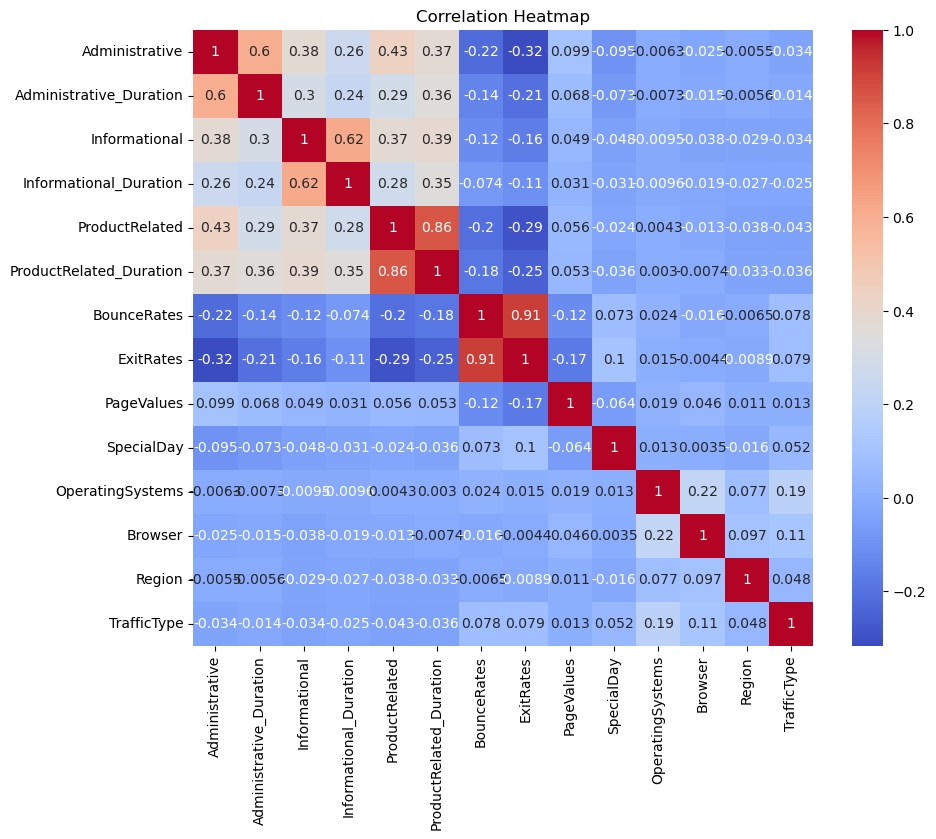

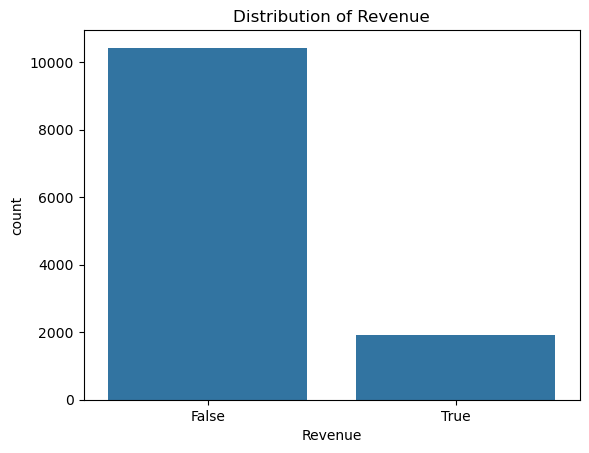

In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Histograms of numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Correlation map of numerical features
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Countplots for discrete variables
sns.countplot(x='Revenue', data=df)
plt.title('Distribution of Revenue')
plt.show()



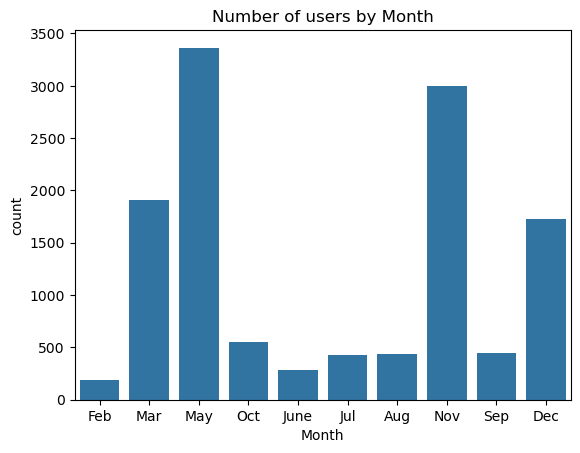

In [6]:
sns.countplot(x='Month', data=df)
plt.title('Number of users by Month')
plt.show()

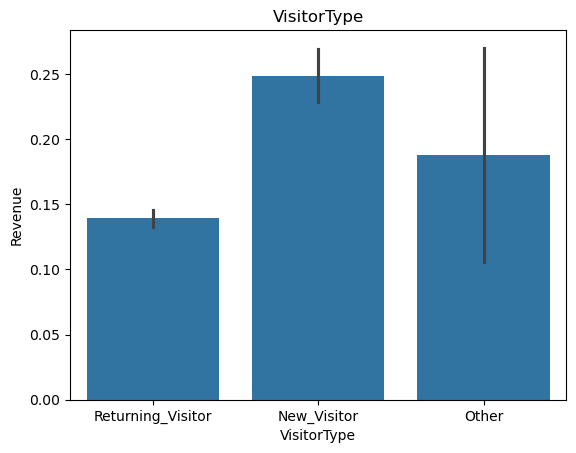

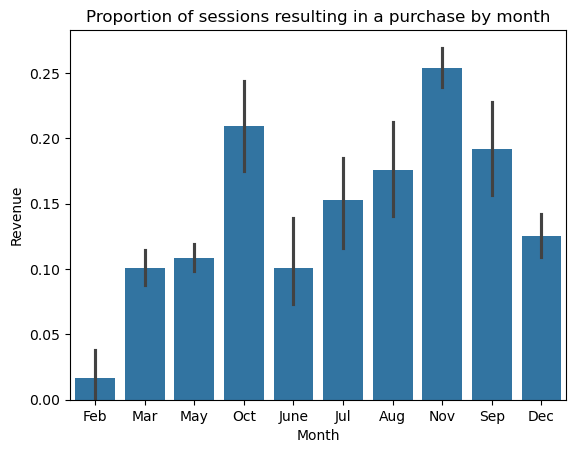

In [7]:
sns.barplot(x='VisitorType', y = 'Revenue' ,data=df)
plt.title('VisitorType')
plt.show()

sns.barplot(x='Month', y = 'Revenue' ,data=df)
plt.title('Proportion of sessions resulting in a purchase by month')
plt.show()


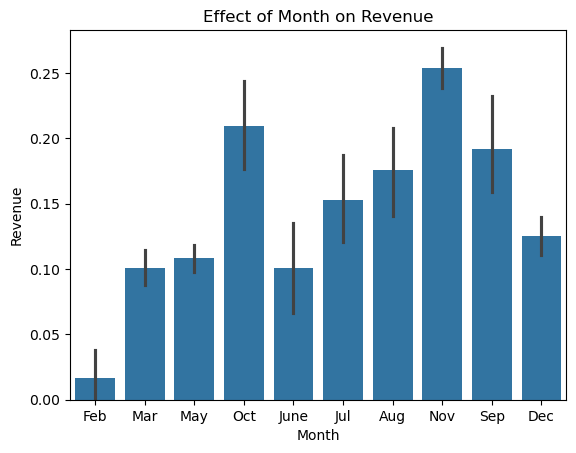

In [8]:
sns.barplot(x='Month', y = 'Revenue' ,data=df)
plt.title('Effect of Month on Revenue')
plt.show()

In [9]:
# Removes columns with visitortype = other

df = df[df.VisitorType != 'Other']

df.shape

(12245, 18)

<Axes: xlabel='VisitorType', ylabel='count'>

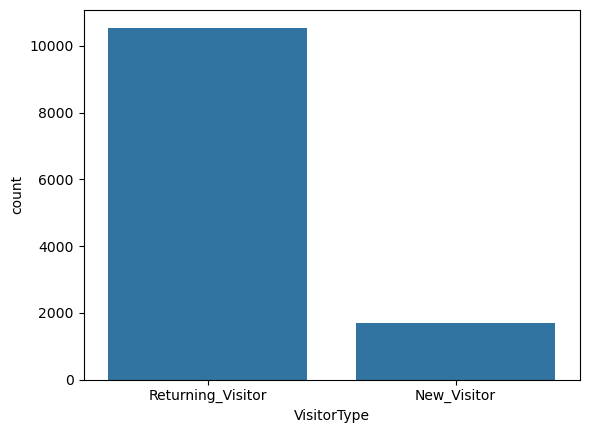

In [10]:
sns.countplot(x='VisitorType', data=df)


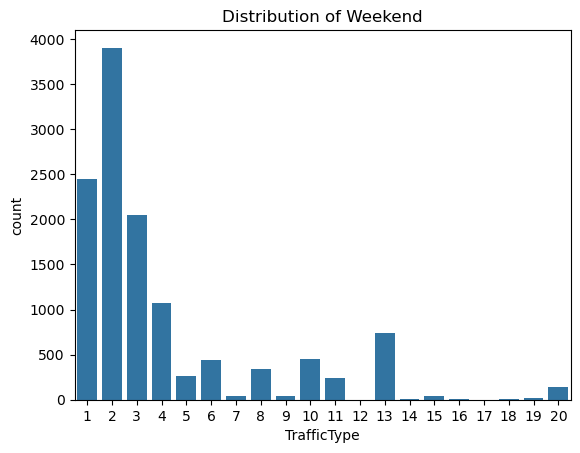

In [11]:
sns.countplot(x='TrafficType', data=df)
plt.title('Distribution of Weekend')
plt.show()

In [ ]:
# Convert weekend boolean to integer
df['Weekend'] = df['Weekend'].astype(int)

# Select categorical columns
categorical = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Month']

# encode our dataframe
df_encoded = pd.get_dummies(df, columns=categorical, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
# Select numerical columns for scaling, SpecialDay already scaled
numerical_scale = ['Administrative', 'Administrative_Duration', 'Informational', 
                 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                 'BounceRates', 'ExitRates', 'PageValues']

df_encoded[numerical_scale] = scaler.fit_transform(df_encoded[numerical_scale])



print(df_encoded.head(10))

   Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   
5       -0.696993                -0.457191      -0.396478   
6       -0.696993                -0.457191      -0.396478   
7       -0.395938                -0.457191      -0.396478   
8       -0.696993                -0.457191      -0.396478   
9       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518       

In [13]:
df_encoded

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,-0.697861,-0.458421,-0.397385,-0.245378,-0.692879,-0.625611,3.691388,3.246799,-0.321103,0.0,...,True,False,True,False,False,False,False,False,False,False
1,-0.697861,-0.458421,-0.397385,-0.245378,-0.670430,-0.592219,-0.458053,1.179669,-0.321103,0.0,...,True,False,True,False,False,False,False,False,False,False
2,-0.697861,-0.458421,-0.397385,-0.245378,-0.692879,-0.625611,3.691388,3.246799,-0.321103,0.0,...,True,False,True,False,False,False,False,False,False,False
3,-0.697861,-0.458421,-0.397385,-0.245378,-0.670430,-0.624220,0.579307,2.006521,-0.321103,0.0,...,True,False,True,False,False,False,False,False,False,False
4,-0.697861,-0.458421,-0.397385,-0.245378,-0.490842,-0.298218,-0.043109,0.146104,-0.321103,0.0,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.204145,0.362773,-0.397385,-0.245378,0.474447,0.305069,-0.309859,-0.287361,0.356179,0.0,...,True,True,False,False,False,False,False,False,False,False
12326,-0.697861,-0.458421,-0.397385,-0.245378,-0.603085,-0.382609,-0.458053,-0.446474,-0.321103,0.0,...,True,False,False,False,False,False,False,True,False,False
12327,-0.697861,-0.458421,-0.397385,-0.245378,-0.580636,-0.529480,1.270881,0.904052,-0.321103,0.0,...,True,False,False,False,False,False,False,True,False,False
12328,0.504814,-0.033666,-0.397385,-0.245378,-0.378599,-0.445088,-0.458053,-0.452276,-0.321103,0.0,...,True,False,False,False,False,False,False,True,False,False


# Reference Location 1

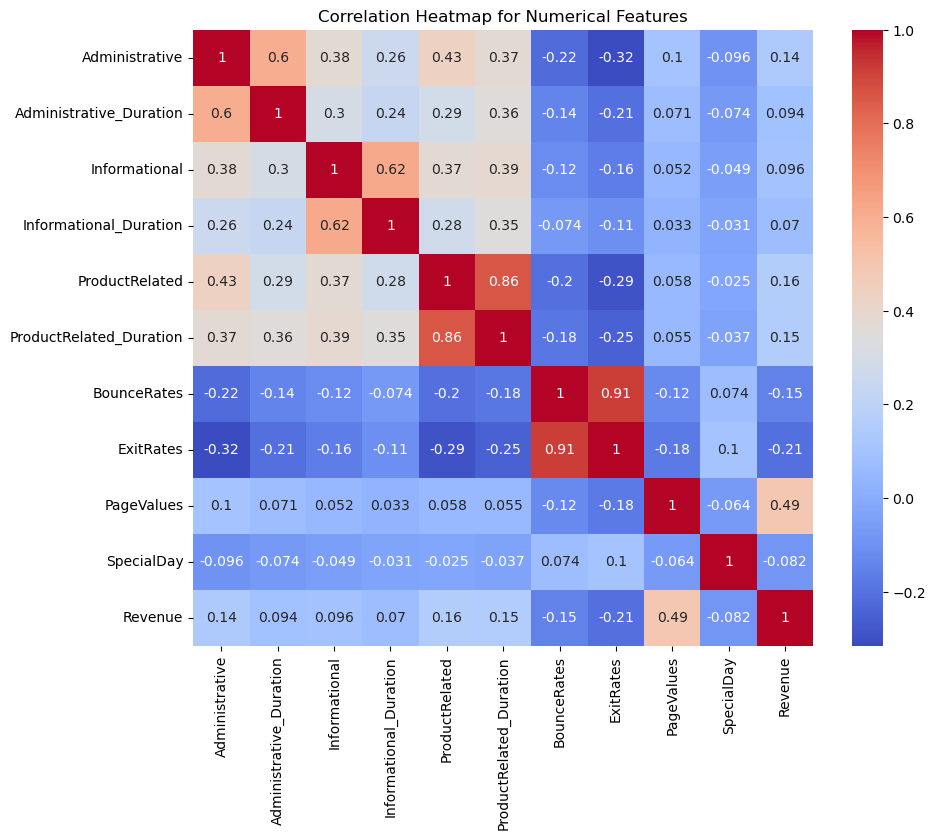

In [14]:
# Visualise the correlation heatmap again for truly numerical features
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded[['Administrative', 'Administrative_Duration', 'Informational', 
                 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                 'BounceRates', 'ExitRates', 'PageValues','SpecialDay','Revenue']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

In [55]:
# Define feature and target variables

X = df_encoded.drop('Revenue', axis=1).values.astype(np.float32)
y = df_encoded['Revenue'].values.astype(np.float32)

# Split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (9796, 67)
Test set shape: (2449, 67)


# Logistic Regression

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2065
         1.0       0.72      0.38      0.49       384

    accuracy                           0.88      2449
   macro avg       0.80      0.67      0.71      2449
weighted avg       0.87      0.88      0.86      2449

Logistic Regression ROC-AUC: 0.8871267150928167


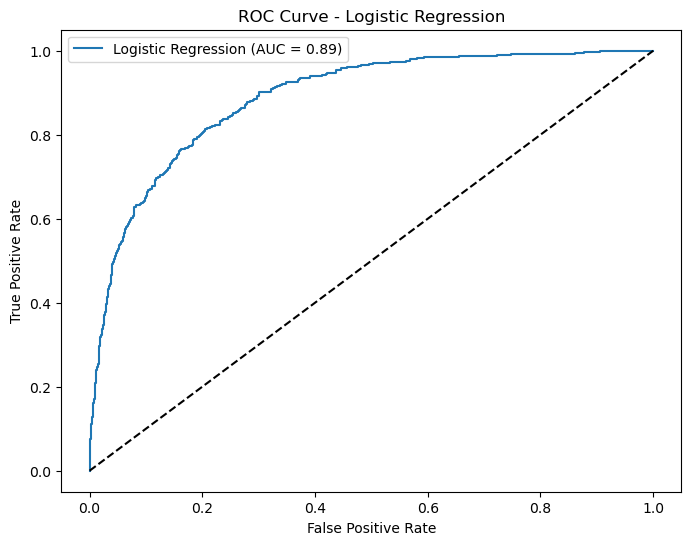

In [ ]:
# Train the LR model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
    
roc_auc_logreg = roc_auc_score(y_test, y_pred_prob_logreg)
print("Logistic Regression ROC-AUC:", roc_auc_logreg)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_logreg)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


# Random Forest

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2065
         1.0       0.72      0.53      0.61       384

    accuracy                           0.89      2449
   macro avg       0.82      0.75      0.78      2449
weighted avg       0.89      0.89      0.89      2449

Random Forest ROC-AUC: 0.9280083484665052


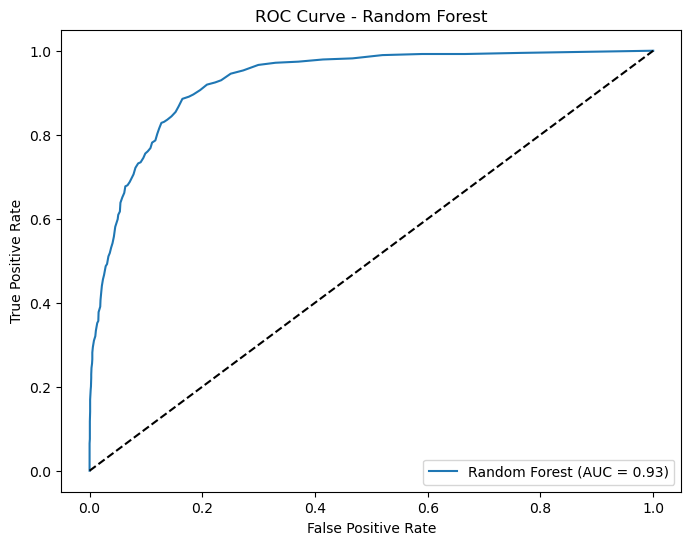

In [57]:
# Train RF model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate RF model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print("Random Forest ROC-AUC:", roc_auc_rf)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


# Model Evaluation

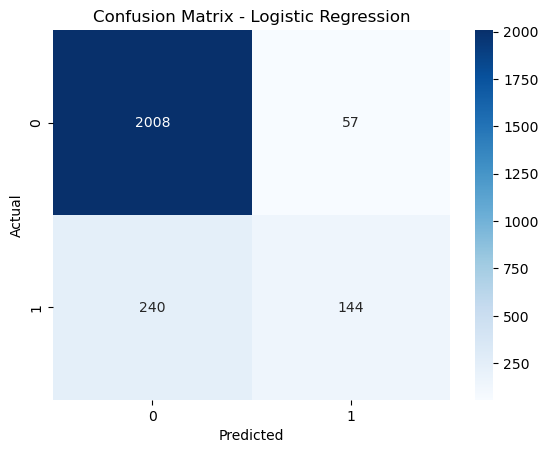

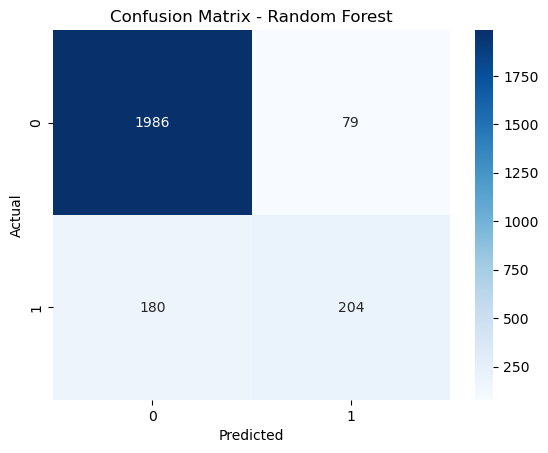

In [58]:
# Plot confusion matrices
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [19]:
# Obtain coeffs from LR model
feature_names = df_encoded.drop('Revenue', axis=1).columns
coefs = logreg.coef_.flatten()
importance_lr = np.abs(coefs)
importance_rf = rf.feature_importances_


# Reference Location 2

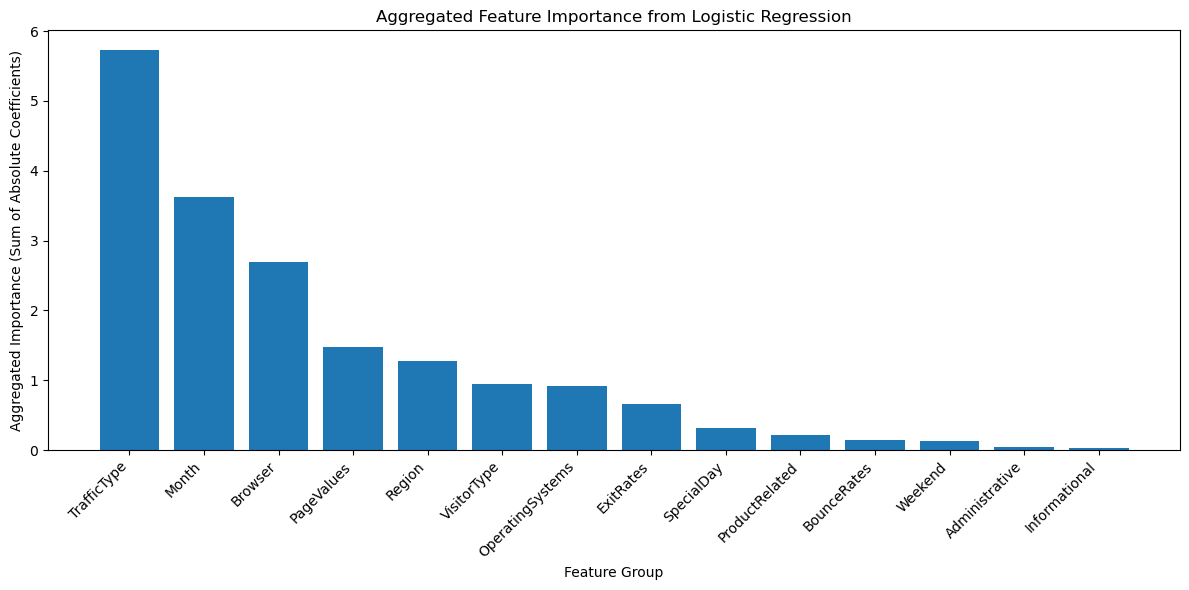

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Full feature list (including encoded columns)
full_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_2', 'Browser_3', 'Browser_4',
       'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9',
       'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20',
       'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep']

# Obtain LR coefficients
coefs = logreg.coef_.flatten()  
abs_coefs = np.abs(coefs)

# Aggregate feature importance 
aggregated_importance = {}
for feat, imp in zip(full_features, abs_coefs):
    # Converts encoded columns back to normal
    if "_" in feat:
        group = feat.split('_')[0]
    else:
        group = feat
    aggregated_importance[group] = aggregated_importance.get(group, 0) + imp

# Sort aggregrated columns
sorted_importance = dict(sorted(aggregated_importance.items(), key=lambda item: item[1], reverse=True))

# Plot the aggregrated features as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_importance.keys(), sorted_importance.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature Group')
plt.ylabel('Aggregated Importance (Sum of Absolute Coefficients)')
plt.title('Aggregated Feature Importance from Logistic Regression')
plt.tight_layout()
plt.show()


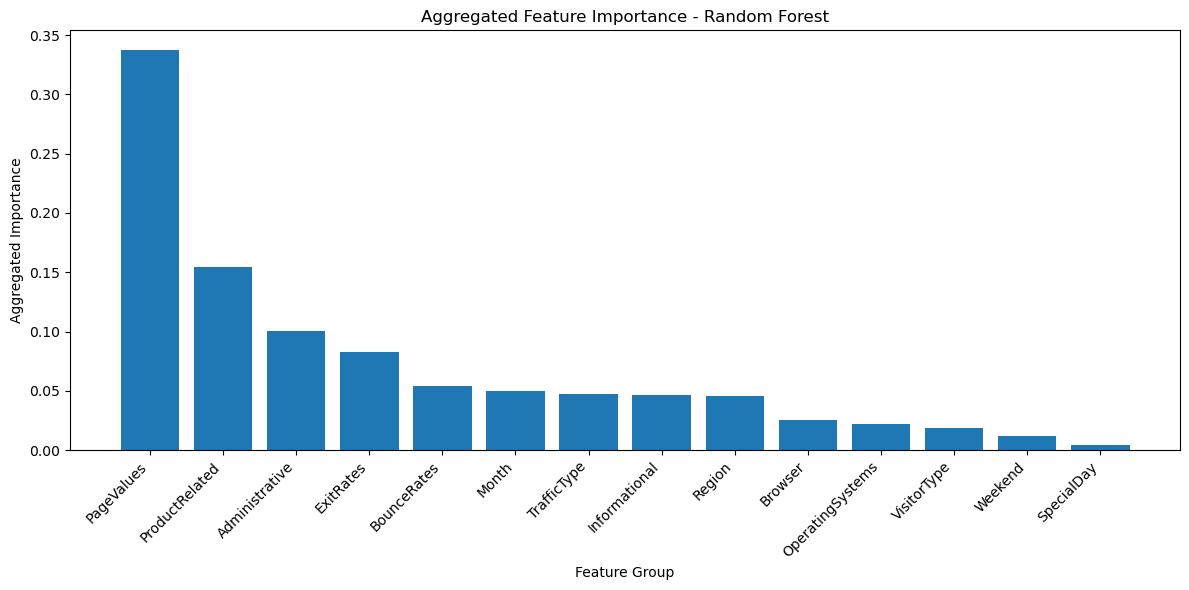

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Full feature list as provided
full_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_2', 'Browser_3', 'Browser_4',
       'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9',
       'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20',
       'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep']

# Assume rf is your trained Random Forest classifier.
# Retrieve the feature importances
importance_rf = rf.feature_importances_

# Aggregate the importances by grouping encoded features by their base name
aggregated_importance_rf = {}
for feat, imp in zip(full_features, importance_rf):
    # For encoded columns (contain an underscore), group by the base name (e.g., 'OperatingSystems')
    if "_" in feat:
        group = feat.split('_')[0]
    else:
        group = feat
    aggregated_importance_rf[group] = aggregated_importance_rf.get(group, 0) + imp

# Sort the aggregated importances in descending order
sorted_importance_rf = dict(sorted(aggregated_importance_rf.items(), key=lambda item: item[1], reverse=True))

# Plot the aggregated feature importances
plt.figure(figsize=(12, 6))
plt.bar(sorted_importance_rf.keys(), sorted_importance_rf.values())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature Group')
plt.ylabel('Aggregated Importance')
plt.title('Aggregated Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


# New RF and LR models

In [22]:
['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Weekend',
       'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4',
       'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7',
       'OperatingSystems_8', 'Browser_2', 'Browser_3', 'Browser_4',
       'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9',
       'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20',
       'VisitorType_Other', 'VisitorType_Returning_Visitor', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep']

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'Weekend',
 'OperatingSystems_2',
 'OperatingSystems_3',
 'OperatingSystems_4',
 'OperatingSystems_5',
 'OperatingSystems_6',
 'OperatingSystems_7',
 'OperatingSystems_8',
 'Browser_2',
 'Browser_3',
 'Browser_4',
 'Browser_5',
 'Browser_6',
 'Browser_7',
 'Browser_8',
 'Browser_9',
 'Browser_10',
 'Browser_11',
 'Browser_12',
 'Browser_13',
 'Region_2',
 'Region_3',
 'Region_4',
 'Region_5',
 'Region_6',
 'Region_7',
 'Region_8',
 'Region_9',
 'TrafficType_2',
 'TrafficType_3',
 'TrafficType_4',
 'TrafficType_5',
 'TrafficType_6',
 'TrafficType_7',
 'TrafficType_8',
 'TrafficType_9',
 'TrafficType_10',
 'TrafficType_11',
 'TrafficType_12',
 'TrafficType_13',
 'TrafficType_14',
 'TrafficType_15',
 'TrafficType_16',
 'TrafficType_17',
 'TrafficType_18',
 'TrafficType_19',
 'TrafficType_20',

In [59]:
X_LR = df_encoded[['TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8',
       'TrafficType_9', 'TrafficType_10', 'TrafficType_11', 'TrafficType_12',
       'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19', 'TrafficType_20', 'Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep','Browser_2', 'Browser_3', 'Browser_4',
       'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9',
       'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13','PageValues']].values.astype(np.float32)
y = df_encoded['Revenue'].values.astype(np.float32)

# Split data to training and test sets for LR
X_train0, X_test0, y_train0, y_test0 = train_test_split(X_LR, y, test_size=0.2, random_state=42)


X_RF = df_encoded[['ProductRelated','PageValues','Administrative','ExitRates','Month_Dec',
       'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep','Informational','BounceRates']].values.astype(np.float32)
y = df_encoded['Revenue'].values.astype(np.float32)

# Split data to training and test sets for RF
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_RF, y, test_size=0.2, random_state=42)

# Reference Location 3

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      2065
         1.0       0.73      0.37      0.49       384

    accuracy                           0.88      2449
   macro avg       0.81      0.67      0.71      2449
weighted avg       0.87      0.88      0.86      2449

Logistic Regression ROC-AUC: 0.8808672568603713


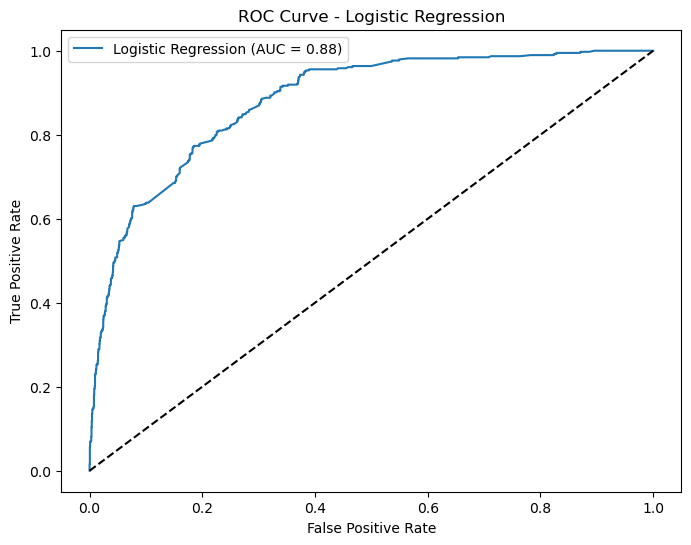

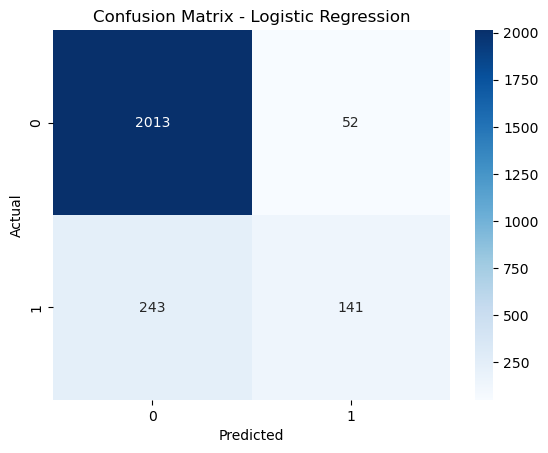

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      2065
         1.0       0.70      0.59      0.64       384

    accuracy                           0.90      2449
   macro avg       0.82      0.77      0.79      2449
weighted avg       0.89      0.90      0.89      2449

Random Forest ROC-AUC: 0.9282403904358354


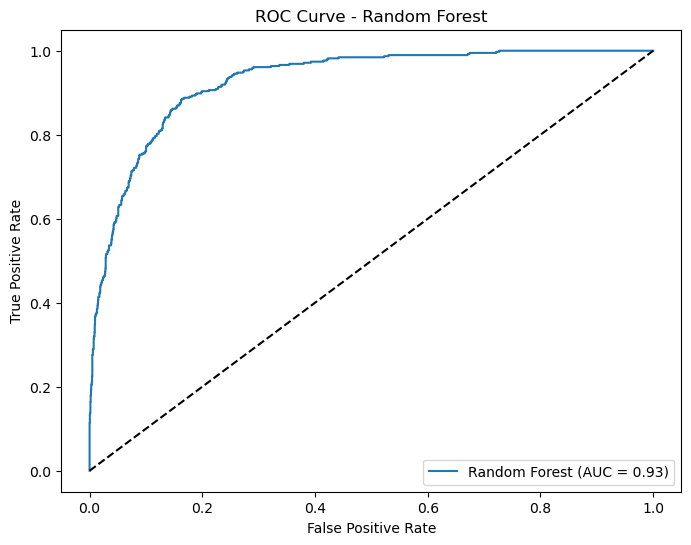

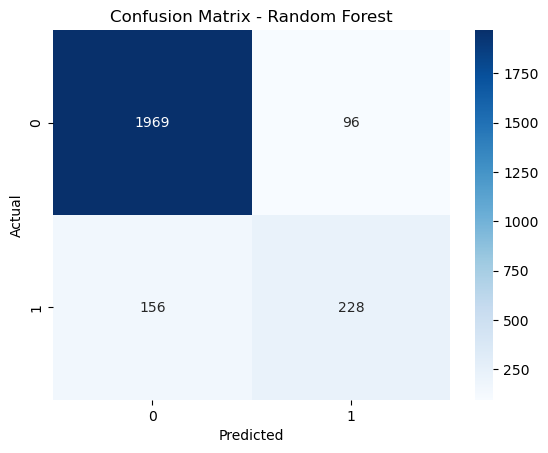

In [66]:
# Initialise new LR model
logreg = LogisticRegression(max_iter=100, C = 1)
logreg.fit(X_train0, y_train0)

# Make predictions
y_pred_logreg = logreg.predict(X_test0)
y_pred_prob_logreg = logreg.predict_proba(X_test0)[:, 1]

# Evaluate LR performance
print("Logistic Regression Classification Report:")
print(classification_report(y_test0, y_pred_logreg))

roc_auc_logreg = roc_auc_score(y_test0, y_pred_prob_logreg)
print("Logistic Regression ROC-AUC:", roc_auc_logreg)

fpr, tpr, thresholds = roc_curve(y_test0, y_pred_prob_logreg)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

# Plot confusion matrices
cm_logreg = confusion_matrix(y_test0, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



# Initialise new RF model
rf = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_leaf=3, min_impurity_decrease=0.0)
rf.fit(X_train1, y_train1)

# Make predictions
y_pred_rf = rf.predict(X_test1)
y_pred_prob_rf = rf.predict_proba(X_test1)[:, 1]

#Evaluate performance
print("Random Forest Classification Report:")
print(classification_report(y_test1, y_pred_rf))


roc_auc_rf = roc_auc_score(y_test1, y_pred_prob_rf)
print("Random Forest ROC-AUC:", roc_auc_rf)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test1, y_pred_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

cm_rf = confusion_matrix(y_test1, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      2065
         1.0       0.68      0.59      0.64       384

    accuracy                           0.89      2449
   macro avg       0.81      0.77      0.79      2449
weighted avg       0.89      0.89      0.89      2449

Random Forest ROC-AUC: 0.9319139679176756


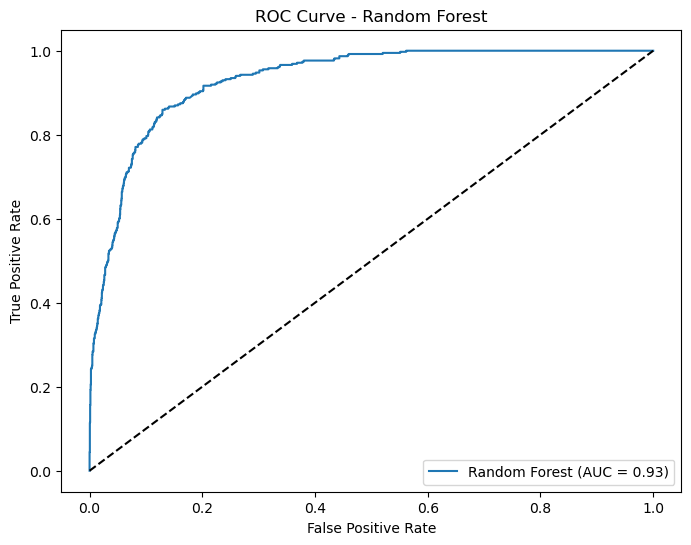

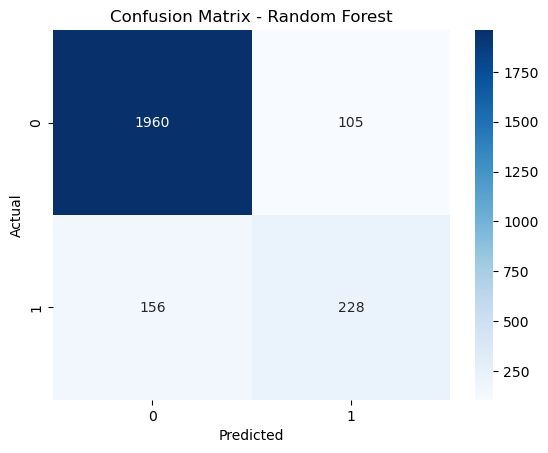

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

#Saw this and wanted to try it
rf = HistGradientBoostingClassifier(l2_regularization = 0.2, max_leaf_nodes = 25)
rf.fit(X_train1, y_train1)

# Make predictions
y_pred_rf = rf.predict(X_test1)
y_pred_prob_rf = rf.predict_proba(X_test1)[:, 1]

#Evaluate performance
print("Random Forest Classification Report:")
print(classification_report(y_test1, y_pred_rf))


roc_auc_rf = roc_auc_score(y_test1, y_pred_prob_rf)
print("Random Forest ROC-AUC:", roc_auc_rf)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test1, y_pred_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

cm_rf = confusion_matrix(y_test1, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Neural Network Binary Classifier

# Reference Location 4

Epoch 10/50, Loss: 0.2196
Epoch 20/50, Loss: 0.1968
Epoch 30/50, Loss: 0.1848
Epoch 40/50, Loss: 0.1734
Epoch 50/50, Loss: 0.1627
Accuracy: 0.8913842384646795
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      2065
         1.0       0.67      0.60      0.63       384

    accuracy                           0.89      2449
   macro avg       0.80      0.77      0.79      2449
weighted avg       0.89      0.89      0.89      2449

Confusion Matrix:
[[1952  113]
 [ 153  231]]


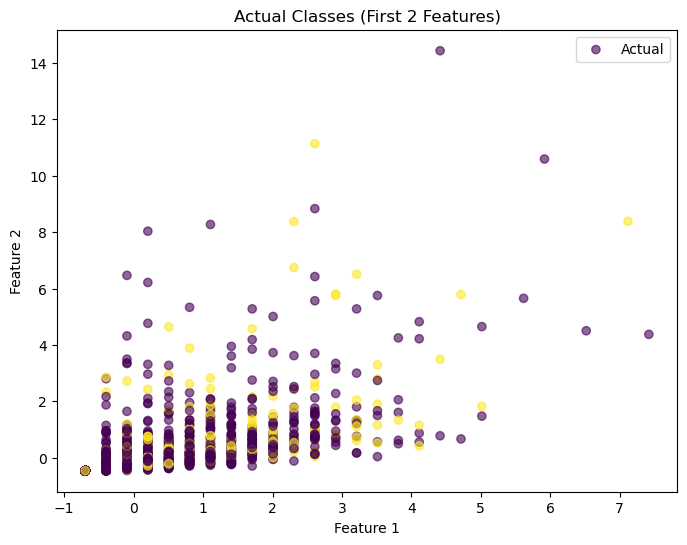

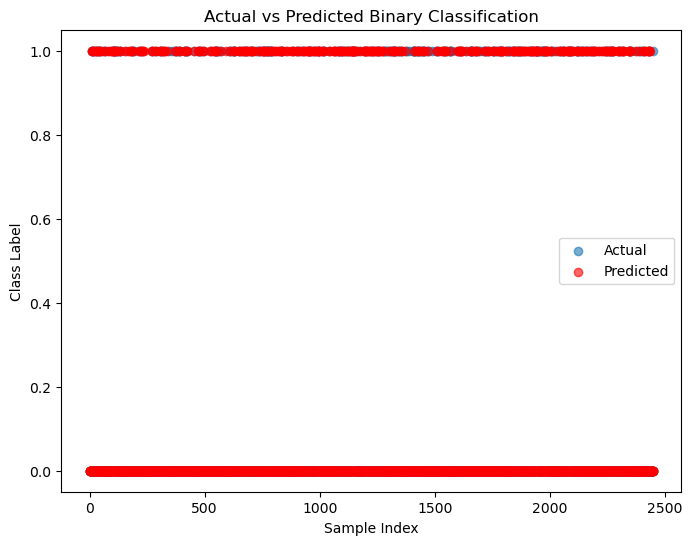

In [ ]:

# Convert data to pytorch tensors
torch_X_train = torch.tensor(X_train, dtype=torch.float32)
torch_y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Make it a column vector
torch_X_test = torch.tensor(X_test, dtype=torch.float32)
torch_y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


# Create dataloader to train BB
train_dataset = TensorDataset(torch_X_train, torch_y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Builds the NN module
class OnlineShoppingNN(nn.Module):
    def __init__(self, input_dim):
        super(OnlineShoppingNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1),
            nn.Sigmoid()  
        )
    
    def forward(self, x):
        return self.net(x)

input_dim = torch_X_train.shape[1]
model = OnlineShoppingNN(input_dim)

# Select the loss function criterion and opitimiser
criterion = nn.BCELoss()
optimiser = optim.Adam(model.parameters(), lr=0.001)

# Train the NN model
def train_model(model, criterion, optimiser, train_loader, epochs=50):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0.0
        for batch_X, batch_y in train_loader:
            optimiser.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimiser.step()
            epoch_loss += loss.item()
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss/len(train_loader):.4f}')

train_model(model, criterion, optimiser, train_loader, epochs=50)

# Test the model
model.eval()
with torch.no_grad():
    y_pred = model(torch_X_test)
    y_pred_labels = (y_pred > 0.5).float()

# Evaluate the model
print("Accuracy:", accuracy_score(torch_y_test.numpy(), y_pred_labels.numpy()))
print("Classification Report:")
print(classification_report(torch_y_test.numpy(), y_pred_labels.numpy()))
print("Confusion Matrix:")
print(confusion_matrix(torch_y_test.numpy(), y_pred_labels.numpy()))

plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, label='Actual', alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Actual Classes (First 2 Features)")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_labels)), y_pred_labels, label='Predicted', color='red', alpha=0.6)
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("Actual vs Predicted Binary Classification")
plt.legend()
plt.show()



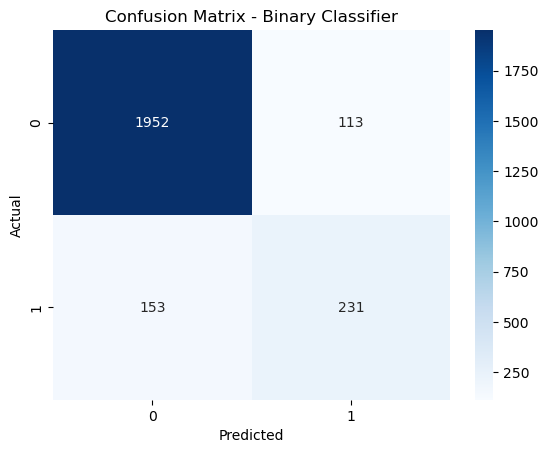

In [69]:
cm_rf = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Binary Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()